In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Basic Data Reading and eyeballing

In [2]:
train=pd.read_csv('../input/machine-hack-and-renew-energy-hackathon/train.csv')
test=pd.read_csv('../input/machine-hack-and-renew-energy-hackathon/test.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../input/machine-hack-and-renew-energy-hackathon/train.csv'

In [3]:
# First five rows of the data
train.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [4]:
# info of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  object 
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          9096

In [5]:
# Checking for missing values
train.isnull().sum()
# Data has no missing values

timestamp                                 0
active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                0
Target                                    0
dtype: int64

In [6]:
train.Target.mean()

46.32859479501452

In [7]:
train.describe().T
# Sum of the values are positive,0 and negative
# This hints that since data has different scales, it will not do good pattern capture
# Therefor we would need to scale or transform the data
# Some hints for transformation:- Log Transformation,power transformation, box-cox transformation

,count,mean,std,min,25%,50%,75%,max
active_power_calculated_by_converter,909604.0,525.886061,474.619576,0.000000,149.620898,379.989929,781.357475,1999.999858
active_power_raw,909604.0,537.639468,482.394907,0.000008,155.813244,383.985926,800.261108,1999.984456
ambient_temperature,909604.0,25.573921,8.025649,5.616541,17.093680,27.919035,32.171696,48.089017
generator_speed,909604.0,931.130882,193.674384,0.000000,770.538574,884.068502,1123.335856,1267.140625
generator_winding_temp_max,909604.0,60.730112,9.721582,25.636366,54.916767,60.034490,65.737187,129.846405
grid_power10min_average,909604.0,527.579537,472.656976,0.000000,147.181552,391.303187,794.875710,1999.991455
nc1_inside_temp,909604.0,31.755823,3.929794,11.141922,29.913803,31.762946,33.469745,52.790030
nacelle_temp,909604.0,31.686413,3.554426,16.010218,30.267423,31.961610,33.546260,48.406106
reactice_power_calculated_by_converter,909604.0,111.080610,78.219944,-318.393721,81.540850,92.005826,124.879153,523.892695
reactive_power,909604.0,133.692333,91.232152,-5.461607,96.045765,107.633378,154.153730,592.815938


In [8]:
train.describe(include=object).T

,count,unique,top,freq
timestamp,909604,414692,2021-07-16 01:52:00,11
turbine_id,909604,16,Turbine_15,58048


In [9]:
train.corr()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
active_power_calculated_by_converter,1.000000,0.996435,-0.055748,0.865399,0.704785,0.951129,-0.048977,-0.114523,0.859807,0.890428,0.047813,0.933014,0.517178,-0.041087
active_power_raw,0.996435,1.000000,-0.053158,0.854905,0.700618,0.950450,-0.048257,-0.112044,0.846891,0.880181,0.047419,0.931078,0.519473,-0.040516
ambient_temperature,-0.055748,-0.053158,1.000000,-0.066242,0.090796,-0.062978,0.257850,0.365564,-0.078901,-0.083129,-0.015721,-0.088032,0.049475,0.420487
generator_speed,0.865399,0.854905,-0.066242,1.000000,0.578988,0.830755,-0.063460,-0.157969,0.701424,0.726535,0.036872,0.829254,0.404138,-0.042414
generator_winding_temp_max,0.704785,0.700618,0.090796,0.578988,1.000000,0.748013,0.056168,0.227567,0.666822,0.683035,0.096984,0.635969,0.452987,0.295409
grid_power10min_average,0.951129,0.950450,-0.062978,0.830755,0.748013,1.000000,-0.057500,-0.134016,0.807921,0.840253,0.049098,0.893555,0.496686,-0.049738
nc1_inside_temp,-0.048977,-0.048257,0.257850,-0.063460,0.056168,-0.057500,1.000000,0.691790,-0.042599,-0.048746,0.067772,-0.058853,0.069330,0.201853
nacelle_temp,-0.114523,-0.112044,0.365564,-0.157969,0.227567,-0.134016,0.691790,1.000000,-0.088603,-0.098586,0.147899,-0.167366,0.164580,0.508957
reactice_power_calculated_by_converter,0.859807,0.846891,-0.078901,0.701424,0.666822,0.807921,-0.042599,-0.088603,1.000000,0.993317,0.035202,0.790763,0.442172,-0.033477
reactive_power,0.890428,0.880181,-0.083129,0.726535,0.683035,0.840253,-0.048746,-0.098586,0.993317,1.000000,0.037892,0.827514,0.458801,-0.034994


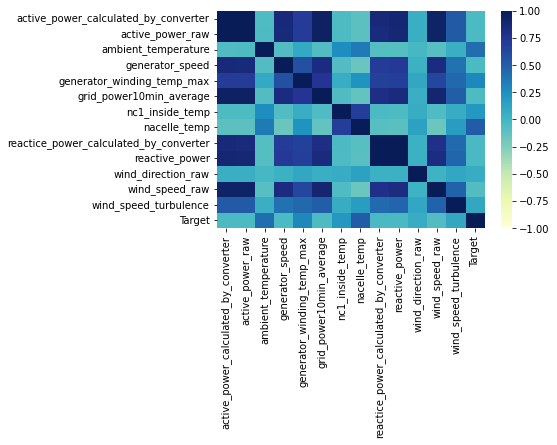

In [10]:
sns.heatmap(train.corr(),vmin=-1,vmax=1,cmap='YlGnBu')
plt.show()

# Exploratory Data Analysis

In [11]:
# Distribution of target
train.Target

0         47.582787
1         46.070328
2         39.989236
3         46.056587
4         54.346095
            ...    
909599    50.768675
909600    44.234821
909601    46.942486
909602    46.392221
909603    48.902180
Name: Target, Length: 909604, dtype: float64

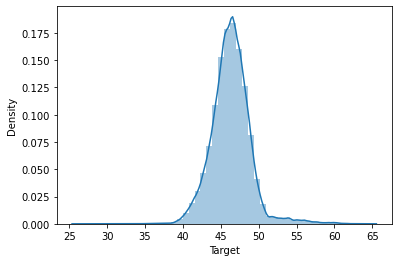

In [12]:
sns.distplot(train.Target)
plt.show()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  object 
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          9096

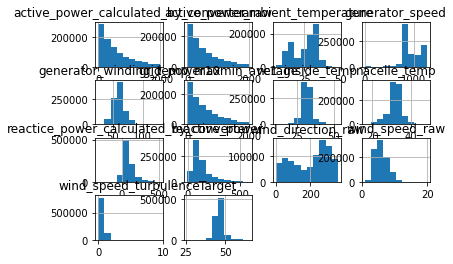

In [14]:
train.hist()
plt.show()

In [15]:
train

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,2021-04-25 19:12:00,929.101908,948.441905,32.736076,1187.303192,83.187140,1343.320577,32.291391,35.152280,152.216446,191.088800,189.901812,7.155343,1.028960,Turbine_13,50.768675
909600,2021-02-20 17:37:00,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,96.621675,93.417590,4.121607,0.595874,Turbine_158,44.234821
909601,2021-10-22 14:18:00,1120.915965,1165.016907,30.901129,1170.456860,62.942943,873.414622,30.491818,33.085164,42.820210,74.111173,230.988398,8.551669,0.951241,Turbine_15,46.942486
909602,2021-02-08 22:03:00,123.444564,116.066919,32.697933,770.190796,57.245207,95.865704,32.338824,31.525384,86.549094,97.470984,65.408801,4.324064,0.247335,Turbine_97,46.392221


In [16]:
# TimeStamp - Day, Month, Year, Hour Min, Weekday
train['Day']=pd.DatetimeIndex(train.timestamp).day
train['Month']=pd.DatetimeIndex(train.timestamp).month
train['Year']=pd.DatetimeIndex(train.timestamp).year
train['hour']=pd.DatetimeIndex(train.timestamp).hour
train['minute']=pd.DatetimeIndex(train.timestamp).minute
train['weekday']=pd.DatetimeIndex(train.timestamp).weekday

In [17]:
train

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,...,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,Day,Month,Year,hour,minute,weekday
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,...,7.057000,0.544082,Turbine_108,47.582787,19,2,2021,20,18,4
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,...,5.474937,0.469031,Turbine_18,46.070328,27,4,2021,4,55,1
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,...,8.092457,0.622318,Turbine_105,39.989236,25,1,2021,6,26,0
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,...,4.071032,0.760719,Turbine_15,46.056587,30,10,2021,3,47,5
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,...,6.357943,0.346068,Turbine_01,54.346095,15,3,2021,0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,2021-04-25 19:12:00,929.101908,948.441905,32.736076,1187.303192,83.187140,1343.320577,32.291391,35.152280,152.216446,...,7.155343,1.028960,Turbine_13,50.768675,25,4,2021,19,12,6
909600,2021-02-20 17:37:00,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,...,4.121607,0.595874,Turbine_158,44.234821,20,2,2021,17,37,5
909601,2021-10-22 14:18:00,1120.915965,1165.016907,30.901129,1170.456860,62.942943,873.414622,30.491818,33.085164,42.820210,...,8.551669,0.951241,Turbine_15,46.942486,22,10,2021,14,18,4
909602,2021-02-08 22:03:00,123.444564,116.066919,32.697933,770.190796,57.245207,95.865704,32.338824,31.525384,86.549094,...,4.324064,0.247335,Turbine_97,46.392221,8,2,2021,22,3,0


In [18]:
test['Day']=pd.DatetimeIndex(test.timestamp).day
test['Month']=pd.DatetimeIndex(test.timestamp).month
test['Year']=pd.DatetimeIndex(test.timestamp).year
test['hour']=pd.DatetimeIndex(test.timestamp).hour
test['minute']=pd.DatetimeIndex(test.timestamp).minute
test['weekday']=pd.DatetimeIndex(test.timestamp).weekday

In [19]:
newtrain=train.drop(columns=['turbine_id','Target','timestamp','Year'])
target=train.Target
test.drop(columns=['timestamp','Year'],inplace=True)

# Feature Engineering

In [20]:
newtrain.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence', 'Day',
       'Month', 'hour', 'minute', 'weekday'],
      dtype='object')

In [21]:
newtrain['difference_active_power']=newtrain.active_power_raw-newtrain.active_power_calculated_by_converter
test['difference_active_power']=test.active_power_raw-test.active_power_calculated_by_converter
newtrain['difference_nacelle']=newtrain.nacelle_temp-newtrain.nc1_inside_temp
test['difference_nacelle']=test.nacelle_temp-test.nc1_inside_temp
newtrain['difference_react']=newtrain.reactive_power-newtrain.reactice_power_calculated_by_converter
test['difference_react']=test.reactive_power-test.reactice_power_calculated_by_converter

In [22]:
newtrain.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence', 'Day',
       'Month', 'hour', 'minute', 'weekday', 'difference_active_power',
       'difference_nacelle', 'difference_react'],
      dtype='object')

In [23]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import catboost as cboost

In [24]:
rf=RandomForestRegressor()
etr=ExtraTreesRegressor()
lgbm=LGBMRegressor()
xgbr=XGBRegressor()
cbr=cboost.CatBoostRegressor()

In [25]:
newtrain.shape,test.shape

((909604, 21), (303202, 22))

In [26]:
pred_rf=rf.fit(newtrain,target).predict(test.drop(columns='turbine_id'))

In [27]:
pred_rf

array([49.90674771, 41.11191861, 48.53152074, ..., 46.3883895 ,
       47.23159737, 44.66344701])

In [28]:
submission=pd.DataFrame({'Target':pred_rf})

In [29]:
submission.to_csv('CompSub.csv') #rf: mape= 0.0726

# Log Transformation

In [30]:
# Log transformation

features=['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence','difference_active_power',
       'difference_nacelle', 'difference_react']

In [31]:
# Has -ve,0,+ve

for i in features:
    newtrain[i]=newtrain[i].apply(lambda col:0.000001 if col<=0 else col)
    newtrain[i]=np.log(newtrain[i])

In [32]:

for i in features:
    test[i]=test[i].apply(lambda col:0.000001 if col<=0 else col)
    test[i]=np.log(test[i])

In [33]:
newtrain.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,...,wind_speed_raw,wind_speed_turbulence,Day,Month,hour,minute,weekday,difference_active_power,difference_nacelle,difference_react
0,6.705194,6.727333,3.456139,7.055845,4.188961,6.822085,3.462041,3.450137,4.952000,5.108980,...,1.954020,-0.608656,19,2,20,18,4,2.905832,-13.815511,3.179880
1,6.038128,6.042754,2.556836,6.833837,4.087174,6.099319,3.478890,3.489079,4.490729,4.734752,...,1.700181,-0.757086,27,4,4,55,1,0.664256,-1.102424,3.204727
2,7.172832,7.198607,2.812313,7.091093,4.115298,7.218702,2.437714,2.908702,5.440781,5.639963,...,2.090932,-0.474304,25,1,6,26,0,3.527407,1.929510,3.928486
3,4.118954,3.979327,3.345971,6.646139,3.705598,2.661999,3.533780,3.486240,4.192847,4.317722,...,1.403897,-0.273491,30,10,3,47,5,-13.815511,-13.815511,2.175492
4,6.386061,6.416175,3.450607,6.953605,4.164209,6.395295,3.478331,3.448920,4.921177,5.076438,...,1.849705,-1.061119,15,3,0,39,0,2.898381,-13.815511,3.137166


In [34]:
# Turbine id
train.turbine_id.unique()

array(['Turbine_108', 'Turbine_18', 'Turbine_105', 'Turbine_15',
       'Turbine_01', 'Turbine_14', 'Turbine_10', 'Turbine_103',
       'Turbine_123', 'Turbine_120', 'Turbine_139', 'Turbine_97',
       'Turbine_19', 'Turbine_20', 'Turbine_13', 'Turbine_158'],
      dtype=object)

In [35]:
test.turbine_id.unique()

array(['Turbine_14', 'Turbine_19', 'Turbine_120', 'Turbine_158',
       'Turbine_13', 'Turbine_139', 'Turbine_105', 'Turbine_20',
       'Turbine_103', 'Turbine_10', 'Turbine_01', 'Turbine_18',
       'Turbine_97', 'Turbine_123', 'Turbine_15', 'Turbine_108'],
      dtype=object)

In [36]:
encoded=train.groupby('turbine_id')['Target'].mean().to_dict()

In [37]:
train['turbine_id']=train['turbine_id'].map(encoded)

In [38]:
newtrain['turbine_id']=train.turbine_id
test['turbine_id']=test.turbine_id.map(encoded)

In [39]:
newtrain.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,...,wind_speed_turbulence,Day,Month,hour,minute,weekday,difference_active_power,difference_nacelle,difference_react,turbine_id
0,6.705194,6.727333,3.456139,7.055845,4.188961,6.822085,3.462041,3.450137,4.952000,5.108980,...,-0.608656,19,2,20,18,4,2.905832,-13.815511,3.179880,46.549006
1,6.038128,6.042754,2.556836,6.833837,4.087174,6.099319,3.478890,3.489079,4.490729,4.734752,...,-0.757086,27,4,4,55,1,0.664256,-1.102424,3.204727,45.178387
2,7.172832,7.198607,2.812313,7.091093,4.115298,7.218702,2.437714,2.908702,5.440781,5.639963,...,-0.474304,25,1,6,26,0,3.527407,1.929510,3.928486,46.585878
3,4.118954,3.979327,3.345971,6.646139,3.705598,2.661999,3.533780,3.486240,4.192847,4.317722,...,-0.273491,30,10,3,47,5,-13.815511,-13.815511,2.175492,46.388378
4,6.386061,6.416175,3.450607,6.953605,4.164209,6.395295,3.478331,3.448920,4.921177,5.076438,...,-1.061119,15,3,0,39,0,2.898381,-13.815511,3.137166,49.288458


# Feature Selection

In [40]:
# using RFE
from sklearn.feature_selection import RFECV

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()

In [42]:
selector=RFECV(estimator=dtree,step=1,cv=5,verbose=5,n_jobs=-1,scoring='neg_mean_absolute_percentage_error',
               min_features_to_select=5)

In [43]:
# Fit the model and find out the optimal features
#selector.fit(newtrain,target)
# feat_names=list(selector.get_feature_names_out)
# print(feat_names)

In [44]:
rfetrain=newtrain.loc[:,['nacelle_temp','ambient_temperature','turbine_id','hour','Day','Month']]

In [45]:
rfetest=test.loc[:,['nacelle_temp','ambient_temperature','turbine_id','hour','Day','Month']]

In [46]:
rfetest

,nacelle_temp,ambient_temperature,turbine_id,hour,Day,Month
0,3.814707,3.694694,47.722849,15,6,5
1,3.179951,2.510143,44.463866,6,4,12
2,3.575590,3.370971,47.722849,19,31,8
3,3.438875,3.298607,45.517760,19,19,9
4,3.429599,3.470364,45.563365,2,4,4
...,...,...,...,...,...,...
303197,3.651749,3.667100,47.186210,20,15,6
303198,3.502268,3.518057,45.834314,20,17,4
303199,3.440374,3.372401,45.517760,9,16,10
303200,3.455131,3.463924,49.288458,18,11,12


In [47]:
rf=RandomForestRegressor(random_state=42)
etr=ExtraTreesRegressor(n_estimators=200,random_state=123)
lgbm=LGBMRegressor(random_state=494)
xgbr=XGBRegressor(random_state=500)
cbr=cboost.CatBoostRegressor(random_state=0)

In [48]:
pred=rf.fit(rfetrain,target).predict(rfetest)

In [49]:
submission=pd.DataFrame({'Target':pred})
submission.to_csv('Sub2.csv')

# Summary of the models
* Taking Date, Time and creating the new features gave us 0.0074 mape
* applying encoding+log transformation+ feature selection gave us 0.00316 mape
* next steps- one can try the parameter tuning of the random forrest model and one can explore the lightgbm model